# IFFT Additive Oscillator

This is an implementation of an additive oscillator that is more fit for larger
amounts of overtones.

## Making a saw wave

First, both pyplot and numpy are imported. Pyplot purely serves visualization
purposes, but numpy is required for most mathematical operations including the
fourier transforms.

`samples` will provide the array size used by both the fft and ifft. The
maximum amplitude is needed later for the bins of the IFFT. In short, the more
samples there are, the higher the magnitude for the bins have to be to reach
the same amplitude in the time-domain representation (the waveform)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

samples = 1024
maxAmp = samples / np.pi

Now, an array of `samples` length is created. It's composed of complex numbers
whose real and imaginary parts are first set to only zeros. The imaginary part
will later be used for frequency bin magnitude information. The real part can be
ignored for now.

In [11]:
a = np.ndarray(samples, complex)
a.real = np.zeros(samples)
a.imag = np.zeros(samples)

The imaginary part of the array is set to the spectral data of a saw wave. A saw
wave can be constructed additively through this function:

$$
y(x)= \sum_{n=1}^{m}\frac{A}{n}\cdot\sin\left(x\right)
$$

Where $A$ is the desired maximum amplitude per partial and $m$ is the overtone
count. $A$, in this case, is `maxAmp`, and $m$ is `samples`. Implementing this,
to create a saw wave, a loop is required, which loops over the imaginary part,
and, for each harmonic, sets the magnitude of the current bin to `maxAmp / n`.
The loop goes on for `samples // 2` steps because of the symmetrical nature of
FFT data. This means that the final step is to symmetrically set the bins on the
latter half of the imaginary part to the inverse of the former half.

In [12]:
for n in range(1,samples // 2):
  s = maxAmp / n
  a.imag[n] = -s
  a.imag[samples - n] = s

Now, let's look at the result:

(Waveform) Time Domain


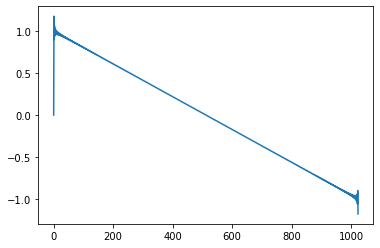

(Power Scale) Frequency Domain


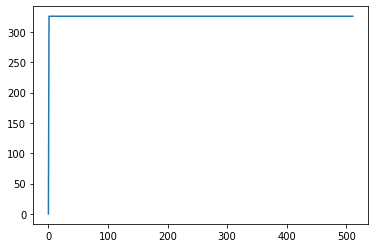

In [13]:
display_data(a)

## Ignore

In [14]:
def display_data(a):
  print("(Waveform) Time Domain")

  plt.plot(np.fft.ifft(a).real, label='time domain')
  plt.show()

  s = np.abs(a)[:samples//2]

  print("(Power Scale) Frequency Domain")

  for n in range(1,samples // 2):
    s[n] *= n

  plt.plot(s, label='frequency domain')
  plt.show()